In [533]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import maup

In [534]:
sc_econ_df = pd.read_csv('processed_individual/sc_econ_block.csv')
sc_election_df = pd.read_csv('processed_individual/sc_election_block.csv')
sc_race_df = pd.read_csv('processed_individual/sc_race_block.csv')

In [535]:
print(sc_econ_df.columns)
print(len(sc_econ_df))

Index(['GEOID', 'STATEFP', 'STATE', 'COUNTYFP', 'COUNTY', 'MEDN_INC22',
       'TOT_HOUS22', 'LESS_25K', '25K_45K', '45K_75K', '75K_125K', '125K_200K',
       '200K_MORE'],
      dtype='object')
3408


In [536]:
print(sc_election_df.columns)
print(len(sc_election_df))

Index(['GEOID', 'TOT_VOTER', 'DEM_VOTER', 'REP_VOTER', 'OTHPAR_VOTER',
       'WHITE_VOTER', 'BLACK_VOTER', 'EASIAN_VOTER', 'HISP_VOTER',
       'NATIVE_VOTER', 'OTHRACE_VOTER'],
      dtype='object')
146844


In [537]:
print(sc_race_df.columns)
print(len(sc_race_df))

Index(['GEOID', 'STATEFP', 'STATE', 'COUNTYFP', 'COUNTY', 'TOT_POP22',
       'NHSP_POP22', 'HSP_POP22', 'WHT_NHSP22', 'BLK_NHSP22', 'AIA_NHSP22',
       'ASN_NHSP22', 'HPI_NHSP22', 'OTH_NHSP22'],
      dtype='object')
3408


In [538]:
economic_columns = ['MEDN_INC22', 'TOT_HOUS22', 'LESS_25K', '25K_45K', 
                    '45K_75K', '75K_125K', '125K_200K', '200K_MORE']
election_columns = ['TOT_VOTER', 'DEM_VOTER', 'REP_VOTER', 'OTHPAR_VOTER',
       'WHITE_VOTER', 'BLACK_VOTER', 'EASIAN_VOTER', 'HISP_VOTER',
       'NATIVE_VOTER', 'OTHRACE_VOTER']
race_columns = ['TOT_POP22',
       'NHSP_POP22', 'HSP_POP22', 'WHT_NHSP22', 'BLK_NHSP22', 'AIA_NHSP22',
       'ASN_NHSP22', 'HPI_NHSP22', 'OTH_NHSP22']

In [539]:
sc_block_inc_gdf = gpd.read_file('raw/census_block/income/sc_inc_2022_bg_shape_file/sc_inc_2022_bg.shp')
print(len(sc_block_inc_gdf.columns))

24


## Get block level geodataframe

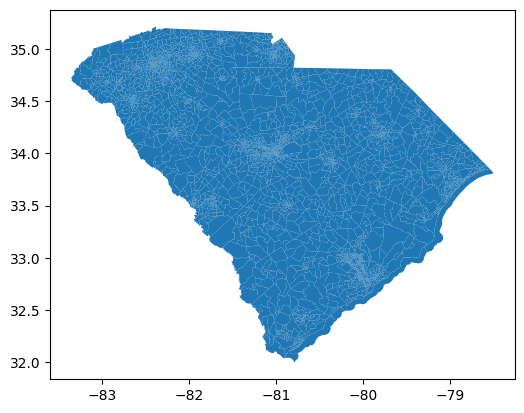

In [540]:
sc_block_inc_gdf.plot()
plt.show()

## Get precincts level geoDataFrames

In [541]:
sc_precinct_gdf = gpd.read_file('states/south_carolina/geodata/south_carolina_precincts.geojson')
print(len(sc_precinct_gdf.columns))

363


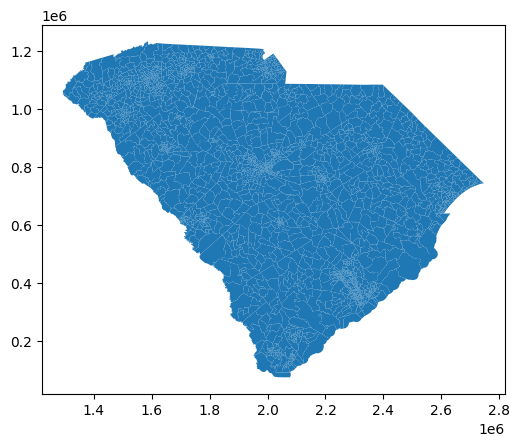

In [542]:

sc_precinct_gdf.plot()
plt.show()

In [543]:
print(sc_block_inc_gdf.columns)

Index(['GEOID', 'STATEFP', 'STATE', 'COUNTYFP', 'COUNTY', 'MEDN_INC22',
       'TOT_HOUS22', 'LESS_10K22', '10K_15K22', '15K_20K22', '20K_25K22',
       '25K_30K22', '30K_35K22', '35K_40K22', '40K_45K22', '45K_50K22',
       '50K_60K22', '60K_75K22', '75K_100K22', '100_125K22', '125_150K22',
       '150_200K22', '200K_MOR22', 'geometry'],
      dtype='object')


In [544]:
sc_block_geometry_gdf = sc_block_inc_gdf[['GEOID','STATEFP', 'STATE', 'COUNTYFP', 'COUNTY', 'geometry']]

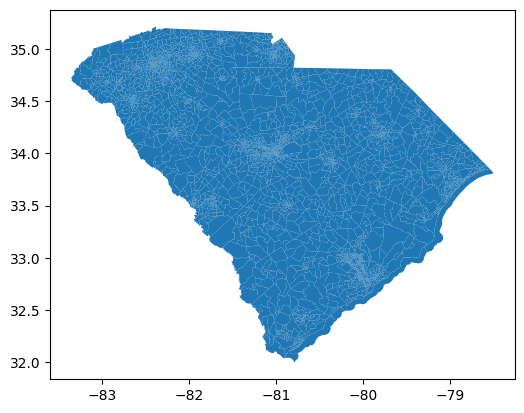

In [545]:
sc_block_geometry_gdf.plot()
plt.show()

## Merging geometry with economical data

In [546]:
print(sc_econ_df.columns)

Index(['GEOID', 'STATEFP', 'STATE', 'COUNTYFP', 'COUNTY', 'MEDN_INC22',
       'TOT_HOUS22', 'LESS_25K', '25K_45K', '45K_75K', '75K_125K', '125K_200K',
       '200K_MORE'],
      dtype='object')


In [547]:
sc_econ_df = sc_econ_df.drop(columns=['STATEFP', 'STATE', 'COUNTYFP', 'COUNTY'])

In [548]:
sc_block_geometry_gdf['GEOID'] = sc_block_geometry_gdf['GEOID'].astype(str)
sc_econ_df['GEOID'] = sc_econ_df['GEOID'].astype(str)

In [549]:
sc_block_geometry_gdf = sc_block_geometry_gdf.merge(sc_econ_df, on='GEOID')

In [550]:
print(sc_block_geometry_gdf.columns)

Index(['GEOID', 'STATEFP', 'STATE', 'COUNTYFP', 'COUNTY', 'geometry',
       'MEDN_INC22', 'TOT_HOUS22', 'LESS_25K', '25K_45K', '45K_75K',
       '75K_125K', '125K_200K', '200K_MORE'],
      dtype='object')


In [551]:
print(sc_race_df.columns)

Index(['GEOID', 'STATEFP', 'STATE', 'COUNTYFP', 'COUNTY', 'TOT_POP22',
       'NHSP_POP22', 'HSP_POP22', 'WHT_NHSP22', 'BLK_NHSP22', 'AIA_NHSP22',
       'ASN_NHSP22', 'HPI_NHSP22', 'OTH_NHSP22'],
      dtype='object')


In [552]:
sc_race_df = sc_race_df.drop(columns=['STATEFP', 'STATE', 'COUNTYFP', 'COUNTY'])

In [553]:
sc_block_geometry_gdf['GEOID'] = sc_block_geometry_gdf['GEOID'].astype(str)
sc_race_df['GEOID'] = sc_race_df['GEOID'].astype(str)
sc_block_geometry_gdf = sc_block_geometry_gdf.merge(sc_race_df, on='GEOID')

In [554]:
print(sc_block_geometry_gdf.columns)


Index(['GEOID', 'STATEFP', 'STATE', 'COUNTYFP', 'COUNTY', 'geometry',
       'MEDN_INC22', 'TOT_HOUS22', 'LESS_25K', '25K_45K', '45K_75K',
       '75K_125K', '125K_200K', '200K_MORE', 'TOT_POP22', 'NHSP_POP22',
       'HSP_POP22', 'WHT_NHSP22', 'BLK_NHSP22', 'AIA_NHSP22', 'ASN_NHSP22',
       'HPI_NHSP22', 'OTH_NHSP22'],
      dtype='object')


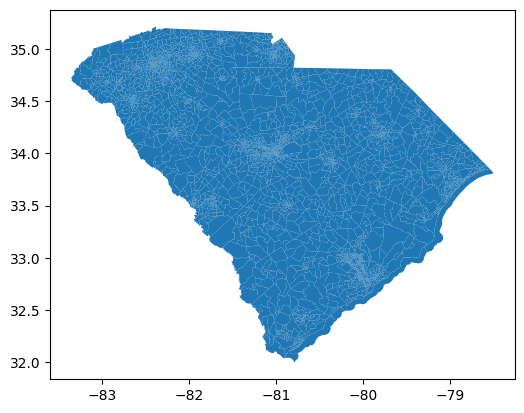

In [555]:
sc_block_geometry_gdf.plot()
plt.show()

In [556]:
# print(sc_election_df.columns)

In [557]:
# sc_block_geometry_gdf['GEOID'] = sc_block_geometry_gdf['GEOID'].astype(str)
# sc_election_df['GEOID'] = sc_election_df['GEOID'].astype(str)
# sc_block_geometry_gdf = sc_block_geometry_gdf.merge(sc_election_df, on='GEOID')

In [558]:
print(sc_block_geometry_gdf.columns)

Index(['GEOID', 'STATEFP', 'STATE', 'COUNTYFP', 'COUNTY', 'geometry',
       'MEDN_INC22', 'TOT_HOUS22', 'LESS_25K', '25K_45K', '45K_75K',
       '75K_125K', '125K_200K', '200K_MORE', 'TOT_POP22', 'NHSP_POP22',
       'HSP_POP22', 'WHT_NHSP22', 'BLK_NHSP22', 'AIA_NHSP22', 'ASN_NHSP22',
       'HPI_NHSP22', 'OTH_NHSP22'],
      dtype='object')


In [559]:
economic_gdf = sc_block_geometry_gdf[['GEOID', 'geometry'] + economic_columns].copy()
economic_gdf['category'] = 'economic'

race_gdf = sc_block_geometry_gdf[['GEOID', 'geometry'] + race_columns].copy()
race_gdf['category'] = 'race'

# election_gdf = sc_block_geometry_gdf [['GEOID'] + election_columns].copy()
# election_gdf['category'] = 'election'

In [560]:
final_sc_block_gdf = pd.concat([economic_gdf, race_gdf], ignore_index=True)

In [561]:
print(final_sc_block_gdf.columns)

Index(['GEOID', 'geometry', 'MEDN_INC22', 'TOT_HOUS22', 'LESS_25K', '25K_45K',
       '45K_75K', '75K_125K', '125K_200K', '200K_MORE', 'category',
       'TOT_POP22', 'NHSP_POP22', 'HSP_POP22', 'WHT_NHSP22', 'BLK_NHSP22',
       'AIA_NHSP22', 'ASN_NHSP22', 'HPI_NHSP22', 'OTH_NHSP22'],
      dtype='object')


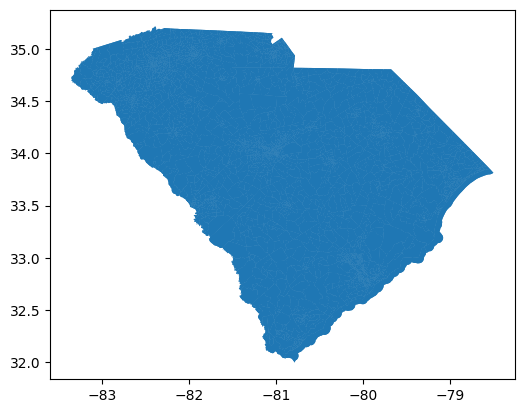

In [562]:
final_sc_block_gdf.plot()
plt.show()

In [563]:
print(len(final_sc_block_gdf))
print(final_sc_block_gdf.columns)

6816
Index(['GEOID', 'geometry', 'MEDN_INC22', 'TOT_HOUS22', 'LESS_25K', '25K_45K',
       '45K_75K', '75K_125K', '125K_200K', '200K_MORE', 'category',
       'TOT_POP22', 'NHSP_POP22', 'HSP_POP22', 'WHT_NHSP22', 'BLK_NHSP22',
       'AIA_NHSP22', 'ASN_NHSP22', 'HPI_NHSP22', 'OTH_NHSP22'],
      dtype='object')


In [564]:
final_sc_block_gdf.to_file('processed_combined/sc_block_combined.geojson', driver="GeoJSON")

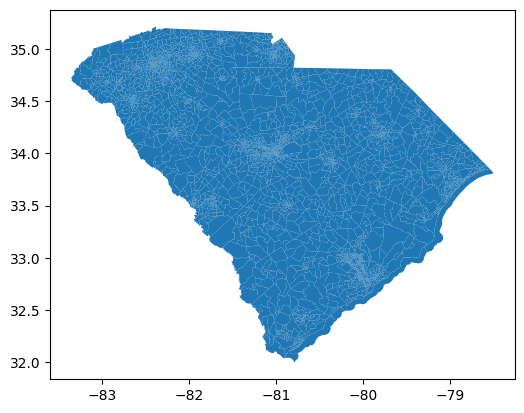

In [565]:
economic_gdf.plot()
plt.show()

In [566]:
precincts_gdf = gpd.read_file('states/south_carolina/geodata/south_carolina_precincts.geojson')


In [567]:
print(economic_gdf.columns)

Index(['GEOID', 'geometry', 'MEDN_INC22', 'TOT_HOUS22', 'LESS_25K', '25K_45K',
       '45K_75K', '75K_125K', '125K_200K', '200K_MORE', 'category'],
      dtype='object')


In [568]:
print(len(precincts_gdf))

2261


In [522]:
print(precincts_gdf.head())

                     UNIQUE_ID COUNTYFP     County         Precinct Prec_Code  \
0  ABBEVILLE-:-ABBEVILLE NO. 1      001  ABBEVILLE  ABBEVILLE NO. 1       001   
1  ABBEVILLE-:-ABBEVILLE NO. 2      001  ABBEVILLE  ABBEVILLE NO. 2       002   
2  ABBEVILLE-:-ABBEVILLE NO. 3      001  ABBEVILLE  ABBEVILLE NO. 3       003   
3  ABBEVILLE-:-ABBEVILLE NO. 4      001  ABBEVILLE  ABBEVILLE NO. 4       004   
4       ABBEVILLE-:-ANTREVILLE      001  ABBEVILLE       ANTREVILLE       005   

   G22A1NO  G22A1YES  G22A2NO  G22A2YES  G22AGRCNEL  ...  GSL121RERI  \
0    355.0     547.0    346.0     554.0        37.0  ...         0.0   
1    254.0     275.0    252.0     274.0        57.0  ...         0.0   
2    219.0     284.0    241.0     279.0        30.0  ...         0.0   
3    197.0     208.0    174.0     242.0        16.0  ...         0.0   
4    280.0     375.0    297.0     375.0        24.0  ...         0.0   

   GSL122DWIL  GSL122OWRI  GSL122RHAG  GSL123OWRI  GSL123RBRA  GSL124DNAS  \
0  

In [569]:
print(economic_gdf.crs)
print(precincts_gdf.crs)
economic_gdf['geometry'] = economic_gdf['geometry'].buffer(0)
precincts_gdf['geometry'] = precincts_gdf['geometry'].buffer(0)

EPSG:4269
EPSG:2273


TypeError: the source and target geometries must have the same CRS. EPSG:4269 EPSG:2273

In [571]:
economic_gdf = economic_gdf.to_crs(precincts_gdf.crs)


In [572]:
assignment = maup.assign(economic_gdf, precincts_gdf)
variables = ['MEDN_INC22', 'TOT_HOUS22', 'LESS_25K', '25K_45K',
             '45K_75K', '75K_125K', '125K_200K', '200K_MORE']
precincts_gdf[variables] = economic_gdf[variables].groupby(assignment).sum()



In [573]:
weighted_sum = (economic_gdf['MEDN_INC22'] * economic_gdf['TOT_HOUS22']).groupby(assignment).sum()
total_households = economic_gdf['TOT_HOUS22'].groupby(assignment).sum()
precincts_gdf['MEDN_INC22'] = weighted_sum / total_households


In [574]:
precincts_gdf = precincts_gdf.fillna(0)


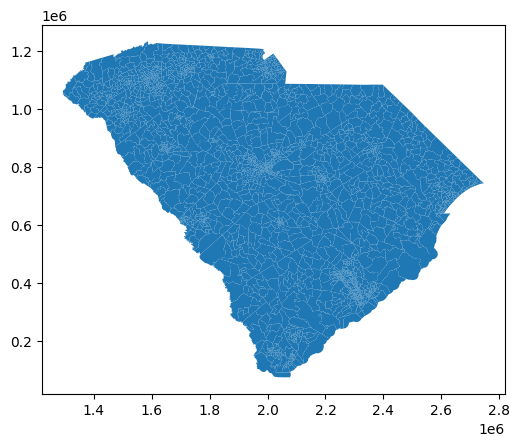

In [575]:
precincts_gdf.plot()
plt.show()

In [576]:
print(len(precincts_gdf))

2261


In [577]:
print(precincts_gdf.columns.values)

['UNIQUE_ID' 'COUNTYFP' 'County' 'Precinct' 'Prec_Code' 'G22A1NO'
 'G22A1YES' 'G22A2NO' 'G22A2YES' 'G22AGRCNEL' 'G22AGRGEDM' 'G22AGROWRI'
 'G22AGRRWEA' 'G22ATGOWRI' 'G22ATGRWIL' 'G22COMOWRI' 'G22COMRECK'
 'G22GOVDCUN' 'G22GOVLREE' 'G22GOVOWRI' 'G22GOVRMCM' 'G22SOSDBUT'
 'G22SOSOWRI' 'G22SOSRHAM' 'G22SUPAELL' 'G22SUPDELL' 'G22SUPGMIC'
 'G22SUPOWRI' 'G22SUPRWEA' 'G22TREAWOR' 'G22TREOWRI' 'G22TRERLOF'
 'G22USSDMAT' 'G22USSOWRI' 'G22USSRSCO' 'GCON01AODD' 'GCON01DAND'
 'GCON01OWRI' 'GCON01RMAC' 'GCON02DLAR' 'GCON02OWRI' 'GCON02RWIL'
 'GCON03OWRI' 'GCON03RDUN' 'GCON04OWRI' 'GCON04RTIM' 'GCON05DHUN'
 'GCON05GGAI' 'GCON05OWRI' 'GCON05RNOR' 'GCON06DCLY' 'GCON06OWRI'
 'GCON06RBUC' 'GCON07DSCO' 'GCON07OWRI' 'GCON07RFRY' 'GSL001OWRI'
 'GSL001RWHI' 'GSL002OWRI' 'GSL002RSAN' 'GSL003OWRI' 'GSL003RCAR'
 'GSL004OWRI' 'GSL004RHIO' 'GSL005OWRI' 'GSL005RCOL' 'GSL006OWRI'
 'GSL006RCRO' 'GSL007DSAL' 'GSL007OWRI' 'GSL007RWES' 'GSL008ATOD'
 'GSL008DMAC' 'GSL008OWRI' 'GSL008RCHA' 'GSL009DPOL' 'GSL009OWRI'
 'GS

In [578]:
precinct_table = precincts_gdf[['Precinct', 'Prec_Code', 'MEDN_INC22', 'LESS_25K']]

print(precinct_table)

             Precinct Prec_Code    MEDN_INC22  LESS_25K
0     ABBEVILLE NO. 1       001  67689.000000      73.0
1     ABBEVILLE NO. 2       002  37895.000000     191.0
2     ABBEVILLE NO. 3       003   5199.348354     269.0
3     ABBEVILLE NO. 4       004  46490.000000     224.0
4          ANTREVILLE       005  78317.000000     120.0
...               ...       ...           ...       ...
2256  WILSON FORESTON       024  55488.178378     231.0
2257              SRS       016      0.000000      11.0
2258         POMFLANT       099  66250.000000      51.0
2259       PINE GROVE       098      0.000000       0.0
2260              SRS       000      0.000000       0.0

[2261 rows x 4 columns]


In [579]:
print(len(precincts_gdf))

2261


In [580]:
precincts_gdf.to_file("processed_combined/precincts_with_economic_blocks.geojson", driver="GeoJSON")